In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import copy
import pickle

In [2]:
def metric(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn /(tn + fp)
    sensitivity = tp/(tp + fn)
    precission = tp/(tp + fp)
    f1 = (precission * sensitivity * 2) / (precission + sensitivity)
    acc = accuracy_score(y_test, y_pred)
    npv = tn/(tn + fn)
    fpr = fp/(fp + tn)
    rmc = 1.0 - acc
    print("Accuracy    : ", acc)
    print("Specificity : ", specificity)
    print("Sensitivity : ", sensitivity)
    print("Precision   : ", precission)
    print("NPV         : ", npv)
    print("FPR         : ", fpr)
    print("RMC         : ", rmc)
    print("F1          : ", f1)
    

In [28]:
def rc(clfs, dt, lbel, names):
    data = copy.deepcopy(dt)
    label = copy.deepcopy(lbel)
    nfpr = []
    ntpr = []
    pfpr = []
    ptpr = []
    label[label == 1] = 2
    label[label == 0] = 1
    neg_lbl = copy.deepcopy(label)
    pos_lbl = copy.deepcopy(label)
    neg_lbl[neg_lbl == 1] = 1 
    neg_lbl[neg_lbl == 2] = 0
    pos_lbl[pos_lbl == 1] = 0
    pos_lbl[pos_lbl == 2] = 1
    for i in range(len(clfs)):
        prob = clfs[i].predict_proba(data)
        negatives = prob[:,:1]
        positives = prob[:,1:]
        fpr, tpr, thresholds = metrics.roc_curve(neg_lbl, negatives, pos_label=None)
        print(len(fpr))
        nfpr.append(fpr)
        ntpr.append(tpr)
        fpr, tpr, thresholds = metrics.roc_curve(pos_lbl, positives, pos_label=None)
        pfpr.append(fpr)
        ptpr.append(tpr)
    
    for i in range(len(names)):
        plt.plot(nfpr[i], ntpr[i], label = names[i])
    plt.plot([0,1],[0,1],'k--')
    plt.legend(loc = 'lower right')
    plt.xlabel("True Positive Rate")
    plt.ylabel("False Positive Rate")
    plt.show()
    for i in range(len(names)):
        plt.plot(pfpr[i], ptpr[i], label = names[i])
    plt.plot([0,1],[0,1],'k--')
    plt.legend(loc = 'lower right')
    plt.xlabel("True Positive Rate")
    plt.ylabel("False Positive Rate")
    plt.show()

In [4]:
read_data = pd.read_csv('heart.csv')
data = read_data.iloc[:,0:13]
label = read_data[["target"]]

In [5]:
data.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, label, stratify=label, test_size=0.1)

In [7]:
clf1 = DecisionTreeClassifier(random_state=0)

In [8]:
cross_val_score(clf1, X_train, y_train, cv=10)

array([0.71428571, 0.78571429, 0.89285714, 0.85714286, 0.85185185,
       0.59259259, 0.88888889, 0.66666667, 0.80769231, 0.80769231])

In [9]:
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [10]:
y_pred = clf1.predict(X_test)

In [11]:
metric(y_test, y_pred)

Accuracy    :  0.6774193548387096
Specificity :  0.6428571428571429
Sensitivity :  0.7058823529411765
Precision   :  0.7058823529411765
NPV         :  0.6428571428571429
FPR         :  0.35714285714285715
RMC         :  0.32258064516129037
F1          :  0.7058823529411765


In [13]:
clf2 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3,2), random_state=1)

In [14]:
cross_val_score(clf2, X_train, y_train, cv=10)

C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-pac

array([0.71428571, 0.75      , 0.89285714, 0.85714286, 0.74074074,
       0.74074074, 0.55555556, 0.85185185, 0.80769231, 0.53846154])

In [15]:
clf2.fit(X_train, y_train)

C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [16]:
y_pred = clf2.predict(X_test)

In [17]:
metric(y_test, y_pred)

Accuracy    :  0.7741935483870968
Specificity :  0.7857142857142857
Sensitivity :  0.7647058823529411
Precision   :  0.8125
NPV         :  0.7333333333333333
FPR         :  0.21428571428571427
RMC         :  0.22580645161290325
F1          :  0.787878787878788


In [18]:
clf3 = RandomForestClassifier(n_estimators = 20)

In [19]:
cross_val_score(clf3, X_train, y_train, cv=10)

C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Gurpreet\AppData\Local\Continuum\anacond

array([0.75      , 0.89285714, 0.82142857, 0.78571429, 0.77777778,
       0.74074074, 0.92592593, 0.81481481, 0.84615385, 0.84615385])

In [20]:
clf3.fit(X_train, y_train)

C:\Users\Gurpreet\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
y_pred = clf3.predict(X_test)

In [22]:
metric(y_test, y_pred)

Accuracy    :  0.8064516129032258
Specificity :  0.8571428571428571
Sensitivity :  0.7647058823529411
Precision   :  0.8666666666666667
NPV         :  0.75
FPR         :  0.14285714285714285
RMC         :  0.19354838709677424
F1          :  0.8125


3
18
16


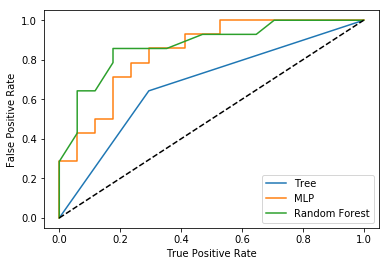

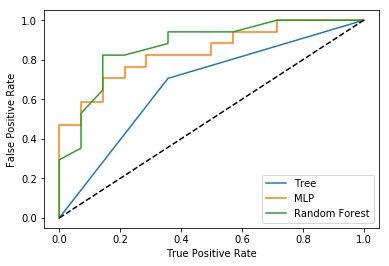

In [29]:
rc([clf1, clf2, clf3], X_test, y_test, ['Tree', 'MLP', 'Random Forest'])

In [69]:
y_test

,target
109,1
297,0
10,1
159,1
42,1
40,1
276,0
64,1
236,0
112,1


In [63]:
label = copy.deepcopy(y_test)
label[label == 1] = 2
label[label == 0] = 1
neg_lbl = copy.deepcopy(label)
pos_lbl = copy.deepcopy(label)
neg_lbl[neg_lbl == 1] = 1 
neg_lbl[neg_lbl == 2] = 0
print(pos_lbl)
pos_lbl[pos_lbl == 1] = 0
print("\n", pos_lbl)
pos_lbl[pos_lbl == 2] = 1

     target
109       2
297       1
10        2
159       2
42        2
40        2
276       1
64        2
236       1
112       2
7         2
121       2
77        2
224       1
144       2
21        2
44        2
199       1
168       1
22        2
30        2
226       1
190       1
195       1
248       1
239       1
73        2
211       1
41        2
180       1
255       1

      target
109       2
297       0
10        2
159       2
42        2
40        2
276       0
64        2
236       0
112       2
7         2
121       2
77        2
224       0
144       2
21        2
44        2
199       0
168       0
22        2
30        2
226       0
190       0
195       0
248       0
239       0
73        2
211       0
41        2
180       0
255       0


In [59]:
neg_lbl

,target
109,0
297,1
10,0
159,0
42,0
40,0
276,1
64,0
236,1
112,0


In [66]:
pos_lbl

,target
109,1
297,0
10,1
159,1
42,1
40,1
276,0
64,1
236,0
112,1


In [70]:
prob = clf1.predict_proba(data)
negatives = prob[:,:1]
positives = prob[:,1:]

In [72]:
len(prob)

303

In [74]:
positives

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [75]:
negatives

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],